# ROAD COST ANALYSIS 

## PART II - COST ANALYSIS

### Introduction
In this part of the project, we will analyze the previously prepared data on road construction costs in Poland.

The original data contains the following columns:

* 'Elementy_rozliczeniowe': Billing elements
* 'Jednostka': Measure unite
* 'Ilosc': Quantity
* 'Cena_jedn': Unit price
* 'Wartosc_calkowita': Total value
* 'Droga': Road number
* 'Rok': Year
* 'Dlugosc_drogi': Road length 
* 'Kategoria_robot': Road number
* 'Kategoria_drogi': Category of construction works
* 'Cena_jedn_per_km': Unit price per km
* 'Wartosc_calkowita_per_km': Total value per km

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read the excel file**

In [2]:
road_data = pd.read_excel('..\Projekt_Analiza_Danych\DATA\Road_cost_analysis.xlsx')

**Check the basic informations of the DataFrame**

In [3]:
road_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Elementy_rozliczeniowe           2105 non-null   object 
 1   Jednostka                        2105 non-null   object 
 2   Ilosc                            2103 non-null   float64
 3   Cena_jedn                        2105 non-null   float64
 4   Wartosc_calkowita                2103 non-null   float64
 5   Droga                            2105 non-null   object 
 6   Rok                              2105 non-null   int64  
 7   Kategoria_robot                  2105 non-null   object 
 8   Kategoria_drogi                  2105 non-null   object 
 9   Dlugosc_drogi                    2105 non-null   float64
 10  Wartosc_calkowita_per_km         2103 non-null   float64
 11  Wartosc_calkowita_kat            2103 non-null   float64
 12  Wartosc_calkowita_pe

In [4]:
road_data.head()

,Elementy_rozliczeniowe,Jednostka,Ilosc,Cena_jedn,Wartosc_calkowita,Droga,Rok,Kategoria_robot,Kategoria_drogi,Dlugosc_drogi,Wartosc_calkowita_per_km,Wartosc_calkowita_kat,Wartosc_calkowita_per_km_kat,Wartosc_calkowita_calosc,Wartosc_calkowita_per_km_calosc
0,Koszt dostosowania się do wymagań ogólnych zaw...,ryczałt,1.0,280864.20,280864.20,DK12ZW,2019,WARUNKI OGOLNE,Krajowa,24.24,11586.806931,114001.142130,4703.017415,32534.398394,1342.178152
1,Dokumentacja realizacyjno-technologiczna i dok...,ryczałt,1.0,33703.70,33703.70,DK12ZW,2019,WARUNKI OGOLNE,Krajowa,24.24,1390.416667,13680.135432,564.362023,3904.127344,161.061359
2,"Koszt utrzymania dróg, po których odbywać się ...",ryczałt,1.0,224691.36,224691.36,DK12ZW,2019,WARUNKI OGOLNE,Krajowa,24.24,9269.445545,91200.913704,3762.413932,26027.518715,1073.742521
3,Saperskie sprawdzenie terenu pod kątem niewypa...,ryczałt,1.0,33703.70,33703.70,DK12ZW,2019,WARUNKI OGOLNE,Krajowa,24.24,1390.416667,13680.135432,564.362023,3904.127344,161.061359
4,Nadzór archeologiczny wraz z wykonaniem ratown...,ryczałt,1.0,28086.42,28086.42,DK12ZW,2019,WARUNKI OGOLNE,Krajowa,24.24,1158.680693,11400.114213,470.301741,3253.439839,134.217815


In [5]:
road_data.describe()

,Ilosc,Cena_jedn,Wartosc_calkowita,Rok,Dlugosc_drogi,Wartosc_calkowita_per_km,Wartosc_calkowita_kat,Wartosc_calkowita_per_km_kat,Wartosc_calkowita_calosc,Wartosc_calkowita_per_km_calosc
count,2103.000000,2.105000e+03,2.103000e+03,2105.000000,2105.000000,2.103000e+03,2.103000e+03,2103.000000,2.103000e+03,2103.000000
mean,13444.852454,1.047572e+04,4.092476e+05,2018.581473,11.493145,4.273183e+04,7.799199e+04,6165.867604,2.634419e+04,1955.689485
std,36049.174818,1.754202e+05,1.043331e+06,2.510271,5.812868,1.156106e+05,3.294163e+05,24006.534509,8.906380e+04,4985.810343
min,0.070000,1.170000e+00,2.599000e+01,2015.000000,0.800000,1.917596e+00,9.592667e-01,0.186121,6.401223e-01,0.124200
25%,44.000000,3.279000e+01,1.200336e+04,2016.000000,7.080000,1.261849e+03,1.111453e+03,120.681037,5.001159e+02,57.361010
50%,443.000000,7.433000e+01,5.983145e+04,2019.000000,10.780000,6.657242e+03,6.635804e+03,649.058293,2.788110e+03,285.919191
75%,5604.465000,3.376000e+02,2.845398e+05,2021.000000,12.980000,2.984189e+04,3.606517e+04,2932.200012,1.640953e+04,1359.742775
max,496551.690000,5.617284e+06,1.423980e+07,2022.000000,24.240000,2.943856e+06,5.779852e+06,422986.743939,1.649492e+06,68048.365379


**Visualize the construction cost of particular road**

<Figure size 864x576 with 0 Axes>

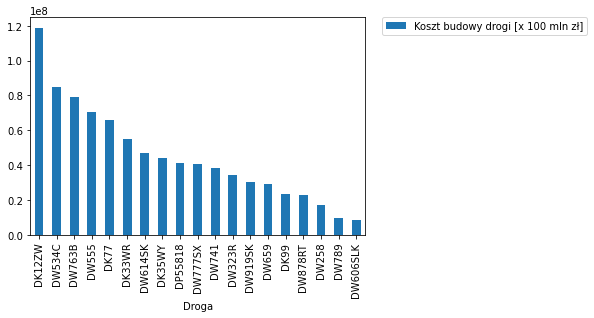

<Figure size 864x576 with 0 Axes>

In [6]:
road_data.groupby(['Droga'], as_index=False).agg({'Wartosc_calkowita': 'sum'}).sort_values(by=['Wartosc_calkowita'],ascending=False).plot.bar(x='Droga', y='Wartosc_calkowita',label='Koszt budowy drogi [x 100 mln zł]',)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

**Visualize the length of particular road**

<Figure size 864x576 with 0 Axes>

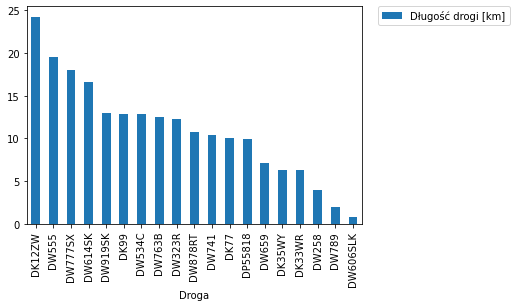

<Figure size 864x576 with 0 Axes>

In [7]:
road_data.groupby(['Droga'], as_index=False).agg({'Dlugosc_drogi': 'max'}).sort_values(by=['Dlugosc_drogi'],ascending=False).plot.bar(x='Droga', y='Dlugosc_drogi',label='Długość drogi [km]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

**Visualize the construction cost of 1 km of particular road**

<Figure size 864x576 with 0 Axes>

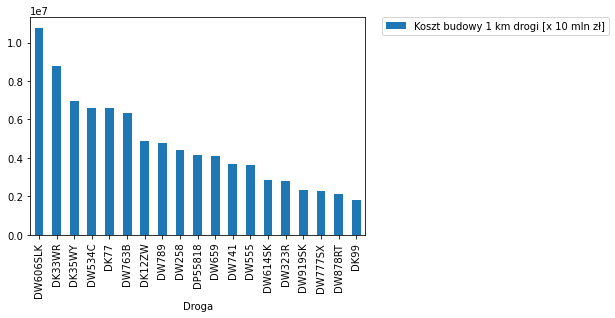

<Figure size 864x576 with 0 Axes>

In [8]:
road_data.groupby(['Droga'], as_index=False).agg({'Wartosc_calkowita_per_km': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km'],ascending=False).plot.bar(x='Droga', y='Wartosc_calkowita_per_km',label='Koszt budowy 1 km drogi [x 10 mln zł]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

**Visualize the average cost of 1 km of particular road category**

<Figure size 864x576 with 0 Axes>

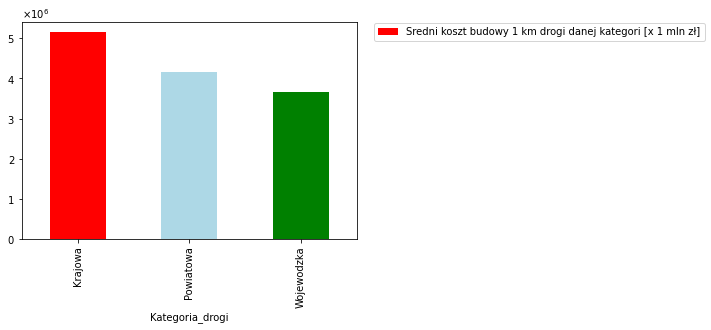

<Figure size 864x576 with 0 Axes>

In [9]:
fig, ax = plt.subplots(1, 1)

road_data.groupby(['Kategoria_drogi'], as_index=False).agg({'Wartosc_calkowita_per_km_kat': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_kat'],ascending=False).plot.bar(x='Kategoria_drogi', y='Wartosc_calkowita_per_km_kat',label='Sredni koszt budowy 1 km drogi danej kategori [x 1 mln zł]', color = ['red','lightblue','green'],ax=ax)

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.figure(figsize=(12,8))

**Visualization of the percentage ratio of the contruction cost of 1km road category**

In [1]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

labels = ['Droga krajowa','Droga powiatowa','Droga wojewodzka']

road_data.groupby(['Kategoria_drogi'], as_index=False).agg({'Wartosc_calkowita_per_km_kat': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_kat'],ascending=False).plot.pie(y='Wartosc_calkowita_per_km_kat',label='Sredni koszt budowy 1 km drogi danej kategori [x 1 mln zł]',autopct='%1.0f%%',ax=ax,labels=len(labels)*[''], colors=['red','lightblue','green'])

ax.set_title('Procentowy stosunek kosztu 1km danej kategorii drogi')
ax.set_xlabel('')
ax.set_ylabel('')
ax.get_legend().remove()

fig.legend( labels,bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.1)
plt.tight_layout()

NameError: name 'plt' is not defined

**Visualize the average cost of 1 km of particular road work category**

<Figure size 864x576 with 0 Axes>

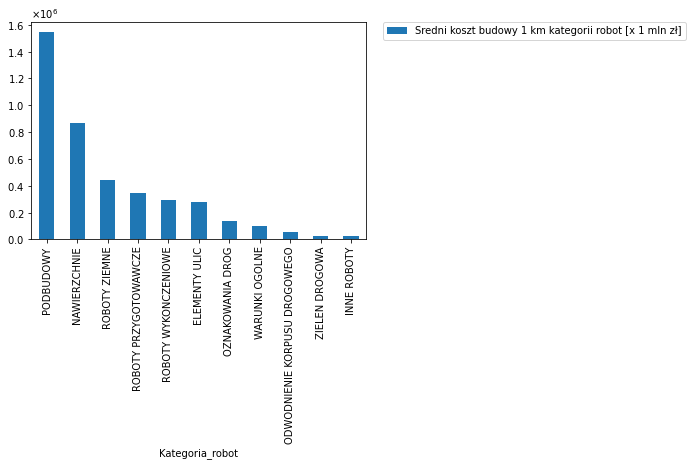

<Figure size 864x576 with 0 Axes>

In [10]:
fig, ax = plt.subplots(1, 1)

road_data.groupby(['Kategoria_robot'], as_index=False).agg({'Wartosc_calkowita_per_km_calosc': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_calosc'],ascending=False).plot.bar(x='Kategoria_robot', y='Wartosc_calkowita_per_km_calosc',label='Sredni koszt budowy 1 km kategorii robot [x 1 mln zł]',ax=ax)

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

**Visualization of the average cost of 1 km of particular road work category for each type of road**

In [11]:
country_roads = road_data[road_data['Kategoria_drogi'] == 'Krajowa'].groupby(('Kategoria_robot'), as_index=False).agg({'Wartosc_calkowita_per_km_kat': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_kat'],ascending=False)

vodvoiship_roads = road_data[road_data['Kategoria_drogi'] == 'Wojewodzka'].groupby(('Kategoria_robot'), as_index=False).agg({'Wartosc_calkowita_per_km_kat': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_kat'],ascending=False)

county_roads = road_data[road_data['Kategoria_drogi'] == 'Powiatowa'].groupby(('Kategoria_robot'), as_index=False).agg({'Wartosc_calkowita_per_km_kat': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km_kat'],ascending=False)

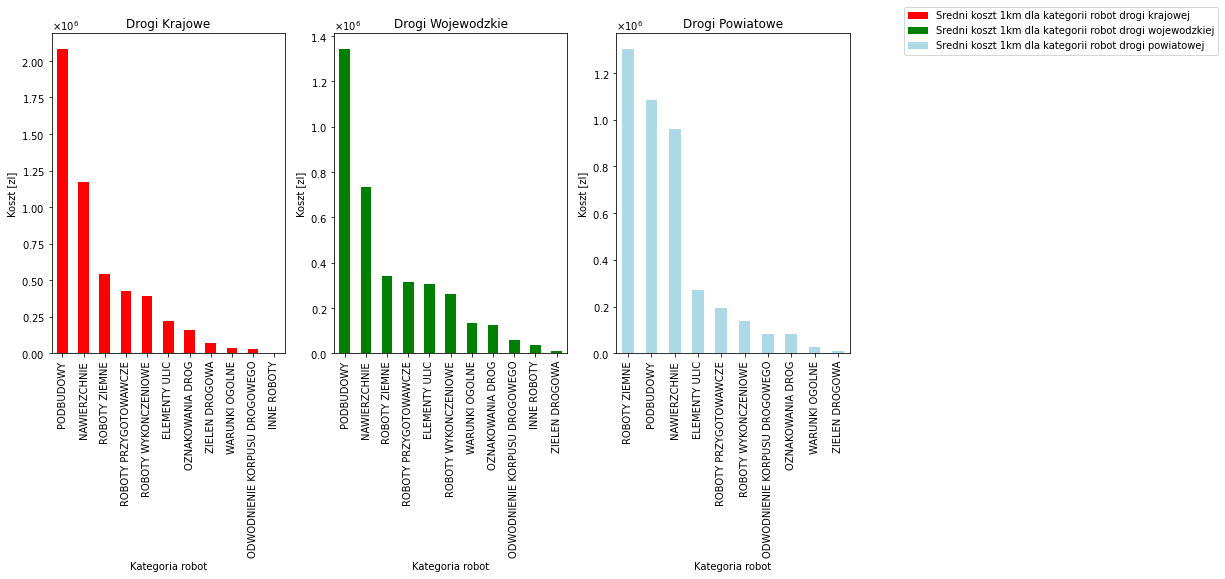

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

country_roads.plot.bar(x='Kategoria_robot', y='Wartosc_calkowita_per_km_kat',ax=ax[0], color='red')
ax[0].set_xlabel('Kategoria robot')
ax[0].set_ylabel('Koszt [zl]')
ax[0].set_title('Drogi Krajowe')
ax[0].get_legend().remove()

vodvoiship_roads.plot.bar(x='Kategoria_robot', y='Wartosc_calkowita_per_km_kat',ax=ax[1], color = 'green')
ax[1].set_xlabel('Kategoria robot')
ax[1].set_ylabel('Koszt [zl]')
ax[1].set_title('Drogi Wojewodzkie')
ax[1].get_legend().remove()

county_roads.plot.bar(x='Kategoria_robot', y='Wartosc_calkowita_per_km_kat',ax=ax[2], color='lightblue')
ax[2].set_xlabel('Kategoria robot')
ax[2].set_ylabel('Koszt [zl]')
ax[2].set_title('Drogi Powiatowe')
ax[2].get_legend().remove()


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
labels[0] = 'Sredni koszt 1km dla kategorii robot drogi krajowej'
labels[1] = 'Sredni koszt 1km dla kategorii robot drogi wojewodzkiej'
labels[2] = 'Sredni koszt 1km dla kategorii robot drogi powiatowej'

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter) 
ax[2].yaxis.set_major_formatter(formatter) 

fig.legend(lines, labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

**Visualization of the percentage ratio of the cost of road work categories for each type of road**

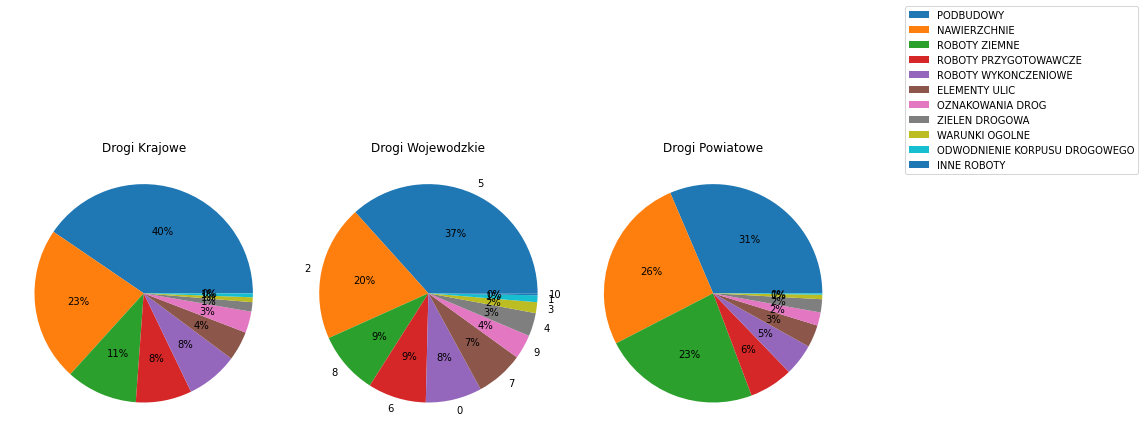

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

labels = country_roads['Kategoria_robot']
# labels[1] = set(vodvoiship_roads['Kategoria_robot'])
# labels[2] = set(county_roads['Kategoria_robot'])

country_roads.plot.pie(y='Wartosc_calkowita_per_km_kat',autopct='%1.0f%%',ax=ax[0], labels=len(labels)*[''])
ax[0].set_title('Drogi Krajowe')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].get_legend().remove()

vodvoiship_roads.plot.pie(y='Wartosc_calkowita_per_km_kat',autopct='%1.0f%%',ax=ax[1],)
ax[1].set_title('Drogi Wojewodzkie')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].get_legend().remove()

county_roads.plot.pie(y='Wartosc_calkowita_per_km_kat',autopct='%1.0f%%',ax=ax[2], labels=len(labels)*[''])
ax[2].set_title('Drogi Powiatowe')
ax[2].set_xlabel('') 
ax[2].set_ylabel('')
ax[2].get_legend().remove()

fig.legend(labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.tight_layout()

**Check the most valuable elements in dataframe**

In [15]:
road_data.sort_values('Wartosc_calkowita', ascending = False).head(10)

,Elementy_rozliczeniowe,Jednostka,Ilosc,Cena_jedn,Wartosc_calkowita,Droga,Rok,Kategoria_robot,Kategoria_drogi,Dlugosc_drogi,Wartosc_calkowita_per_km,Wartosc_calkowita_kat,Wartosc_calkowita_per_km_kat,Wartosc_calkowita_calosc,Wartosc_calkowita_per_km_calosc
64,Podbudowa z bet. asfaltowego AC 22P 35/50 - gr...,m2,211398.47,67.36,1.423980e+07,DK12ZW,2019,PODBUDOWY,Krajowa,24.24,587450.533795,5.779852e+06,238442.748480,1.649492e+06,68048.365379
61,Warstwa mieszanki związanej spoiwem hydraulicz...,m2,251114.52,47.65,1.196561e+07,DK12ZW,2019,PODBUDOWY,Krajowa,24.24,493630.646782,4.856770e+06,200361.803048,1.386057e+06,57180.573822
72,Warstwa wiążąca z bet. asfaltowego AC16W 35/50...,m2,207695.48,52.80,1.096632e+07,DK12ZW,2019,NAWIERZCHNIE,Krajowa,24.24,452405.996040,4.451166e+06,183628.957535,1.270303e+06,52405.243926
81,Warstwa ścieralna z SMA 8 45/80-55 - KR5 - gru...,m2,205473.68,45.25,9.297684e+06,DK12ZW,2019,NAWIERZCHNIE,Krajowa,24.24,383567.822607,3.773876e+06,155687.944072,1.077014e+06,44431.253082
1044,Warstwa mieszanki związanej spoiwem hydraulicz...,m2,127740.80,72.44,9.253544e+06,DW534C,2022,PODBUDOWY,Wojewodzka,12.82,721805.269267,8.495447e+05,66267.140877,5.669045e+05,44220.317079
56,Podbudowa z mieszanki kruszywa niezwiązanego 0...,m2,250499.16,36.33,9.100634e+06,DK12ZW,2019,PODBUDOWY,Krajowa,24.24,375438.716287,3.693895e+06,152388.387187,1.054188e+06,43489.603760
1168,Warstwa mieszanki związanej spoiwem hydraulicz...,m2,183977.99,47.48,8.735275e+06,DW555,2017,PODBUDOWY,Wojewodzka,19.47,448653.054196,1.217959e+06,62555.678639,8.127488e+05,41743.644104
1669,Warstwa mieszanki związanej spoiwem hydraulicz...,m2,119497.16,72.44,8.656374e+06,DW763B,2022,PODBUDOWY,Wojewodzka,12.46,694733.087512,7.724035e+05,61990.649315,5.154278e+05,41366.597871
1648,Wykopy wykonane mechanicznie w gruncie nieskal...,m3,184397.62,43.28,7.980729e+06,DW763B,2022,ROBOTY PRZYGOTOWAWCZE,Wojewodzka,12.46,640507.944912,7.121160e+05,57152.169820,4.751978e+05,38137.861959
1172,Podbudowa z bet. asfaltowego AC 22P 35/50 - gr...,m2,128780.81,60.67,7.813132e+06,DW555,2017,PODBUDOWY,Wojewodzka,19.47,401290.793154,1.089385e+06,55951.960346,7.269506e+05,37336.957578


**Check the most valuable element for each road in dataframe**

In [16]:
top_val_elem_by_road = road_data.groupby(['Droga','Elementy_rozliczeniowe', 'Kategoria_robot'], as_index=False).agg({'Wartosc_calkowita': 'max'},
                                                {'Elementy_rozliczeniowe':'max'}).sort_values(by=['Wartosc_calkowita'],ascending=False).drop_duplicates('Droga',keep='first').reset_index()

In [17]:
top_val_elem_by_road

,index,Droga,Elementy_rozliczeniowe,Kategoria_robot,Wartosc_calkowita
0,47,DK12ZW,Podbudowa z bet. asfaltowego AC 22P 35/50 - gr...,PODBUDOWY,1.423980e+07
1,1059,DW534C,Warstwa mieszanki związanej spoiwem hydraulicz...,PODBUDOWY,9.253544e+06
2,1172,DW555,Warstwa mieszanki związanej spoiwem hydraulicz...,PODBUDOWY,8.735275e+06
3,1678,DW763B,Warstwa mieszanki związanej spoiwem hydraulicz...,PODBUDOWY,8.656374e+06
4,543,DK77,Wykonanie nasypów mechanicznie z gruntów nies...,ROBOTY ZIEMNE,5.687755e+06
5,1497,DW741,Krawężniki betonowe 20x30x100cm- wyliczenie il...,ELEMENTY ULIC,4.808516e+06
6,1320,DW614SK,Podbudowa z bet. asfaltowego AC 22P 35/50 - gr...,PODBUDOWY,4.633024e+06
7,169,DK33WR,Grunt związany spoiwem hydraulicznym C0.4/0.5 ...,PODBUDOWY,4.612021e+06
8,721,DP55818,"Podbudowa z mieszanki niezwiązanej 0/31.5, CB...",PODBUDOWY,4.187569e+06
9,309,DK35WY,Grunt związany spoiwem hydraulicznym C0.4/0.5 ...,PODBUDOWY,4.081829e+06


**Check the most valuable element for each road category in dataframe**

In [18]:
top_val_elem_by_cat = road_data.groupby(['Kategoria_drogi','Elementy_rozliczeniowe', 'Kategoria_robot'], as_index=False).agg({'Wartosc_calkowita': 'max'},
                                                {'Elementy_rozliczeniowe':'max'}).sort_values(by=['Wartosc_calkowita'],ascending=False).drop_duplicates('Kategoria_drogi',keep='first').reset_index()

In [19]:
top_val_elem_by_cat

,index,Kategoria_drogi,Elementy_rozliczeniowe,Kategoria_robot,Wartosc_calkowita
0,124,Krajowa,Podbudowa z bet. asfaltowego AC 22P 35/50 - gr...,PODBUDOWY,1.423980e+07
1,774,Wojewodzka,Warstwa mieszanki związanej spoiwem hydraulicz...,PODBUDOWY,9.253544e+06
2,438,Powiatowa,"Podbudowa z mieszanki niezwiązanej 0/31.5, CB...",PODBUDOWY,4.187569e+06


**As we can see above most valuable work categories are 'NAWIERZCHNIE', 'PODBUDOWY' and 'ROBOTY ZIEMNE'**

**Let's check how their price has changed over the years**

In [20]:
elem_cost_by_year = road_data[road_data['Kategoria_robot'].isin(['NAWIERZCHNIE','PODBUDOWY','ROBOTY ZIEMNE'])].groupby(['Rok','Kategoria_robot'], as_index=False).agg({'Wartosc_calkowita_per_km_calosc': 'sum'}).sort_values(by=['Rok']).reset_index().drop('index',axis=1)

In [21]:
elem_cost_by_year

,Rok,Kategoria_robot,Wartosc_calkowita_per_km_calosc
0,2015,NAWIERZCHNIE,161186.047559
1,2015,PODBUDOWY,200172.095868
2,2015,ROBOTY ZIEMNE,55349.796538
3,2016,NAWIERZCHNIE,62072.833636
4,2016,PODBUDOWY,122846.373361
5,2016,ROBOTY ZIEMNE,19992.910605
6,2017,NAWIERZCHNIE,74595.216389
7,2017,PODBUDOWY,153642.599020
8,2017,ROBOTY ZIEMNE,33073.211210
9,2018,ROBOTY ZIEMNE,51538.460381


<AxesSubplot:xlabel='Rok'>

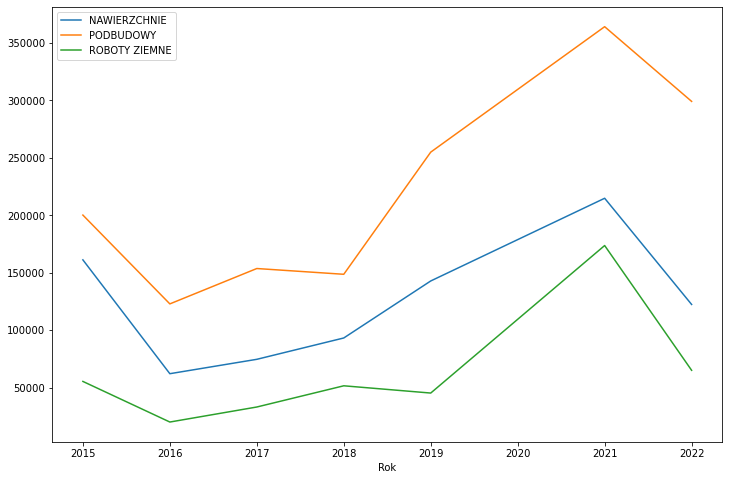

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

labels = elem_cost_by_year['Kategoria_robot']
# labels[1] = set(vodvoiship_roads['Kategoria_robot'])
# labels[2] = set(county_roads['Kategoria_robot'])

elem_cost_by_year[elem_cost_by_year['Kategoria_robot']=='NAWIERZCHNIE'].plot(x='Rok', y='Wartosc_calkowita_per_km_calosc',label='NAWIERZCHNIE', ax=ax)
elem_cost_by_year[elem_cost_by_year['Kategoria_robot']=='PODBUDOWY'].plot(x='Rok', y='Wartosc_calkowita_per_km_calosc',label='PODBUDOWY', ax=ax)
elem_cost_by_year[elem_cost_by_year['Kategoria_robot']=='ROBOTY ZIEMNE'].plot(x='Rok', y='Wartosc_calkowita_per_km_calosc',label='ROBOTY ZIEMNE', ax=ax)

**Let's check the trends in the price change of 'NAWIERZCHNIE', 'PODBUDOWY' and 'ROBOTY ZIEMNE'**

<Figure size 864x432 with 0 Axes>

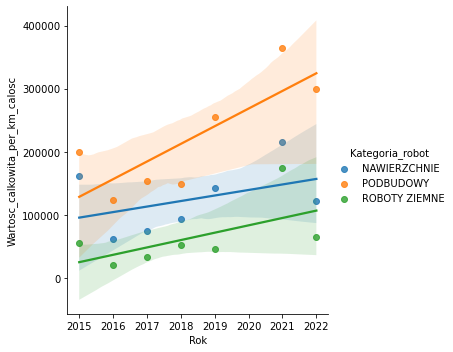

In [23]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Rok',y='Wartosc_calkowita_per_km_calosc',hue='Kategoria_robot',data=elem_cost_by_year)

**Lets check the distribution of 'NAWIERZCHNIE', 'PODBUDOWY' and 'ROBOTY ZIEMNE' prices**

<AxesSubplot:xlabel='Kategoria_robot', ylabel='Wartosc_calkowita_per_km_calosc'>

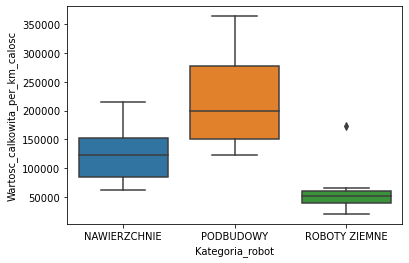

In [24]:
sns.boxplot(data = elem_cost_by_year, y= 'Wartosc_calkowita_per_km_calosc', x='Kategoria_robot')

**Lets check the trend factor of 'NAWIERZCHNIE' price**

To check our solution we will do it with two different methods.

In first method we will use pct_change() function to show the percentage change of 'NAWIERZCHNIE' cost year after year. After that we will get the mean value of these changes

In [25]:
elem_cost_by_year[elem_cost_by_year['Kategoria_robot'] == 'NAWIERZCHNIE']

,Rok,Kategoria_robot,Wartosc_calkowita_per_km_calosc
0,2015,NAWIERZCHNIE,161186.047559
3,2016,NAWIERZCHNIE,62072.833636
6,2017,NAWIERZCHNIE,74595.216389
11,2018,NAWIERZCHNIE,93170.782577
12,2019,NAWIERZCHNIE,142808.518083
15,2021,NAWIERZCHNIE,214811.085428
18,2022,NAWIERZCHNIE,122355.891634


In [26]:
elem_cost_by_year[elem_cost_by_year['Kategoria_robot'] == 'NAWIERZCHNIE']['Wartosc_calkowita_per_km_calosc'].pct_change()

0          NaN
3    -0.614899
6     0.201737
11    0.249018
12    0.532761
15    0.504190
18   -0.430402
Name: Wartosc_calkowita_per_km_calosc, dtype: float64

In [27]:
elem_cost_by_year[elem_cost_by_year['Kategoria_robot'] == 'NAWIERZCHNIE']['Wartosc_calkowita_per_km_calosc'].pct_change().mean()

0.07373394172154994

**Second method - np.polyfit**

In the second attempt we will use the np.polyfit function to get the trend factor of 'NAWIERZCHNIE' prices over the years. 

In [34]:
f = np.polyfit(elem_cost_by_year['Rok'], elem_cost_by_year['Wartosc_calkowita_per_km_calosc'], deg=1)

In [29]:
f[0]

16139.774369391527

In [30]:
factor1 = np.polyval(f, 2023)
factor1

212203.77675493807

In [31]:
factor2 = np.polyval(f, 2024)
factor2

228343.5511243306

In [32]:
Pavement_cost_trend = factor2 / factor1

In [33]:
Pavement_cost_trend

1.0760579034746938

**Summary**

The analysis shows that country roads are the most expensive, followed by county roads and the cheapest voivodeship roads. It is interesting because county roads are of a lower category than voivodeship roads.

For each road category, the most expensive categories of works were pavements, foundations and earthworks. Together, they account for almost 75% of the construction costs of the entire road.

We checked the growth trends for the above-mentioned categories of works. All prices have risen in recent years and have seen prices soar in the past two years.

The largest price fluctuations occur in the foundatios work category, and the smallest in earthworks work category.

We also checked the value of the price trend for road pavements using two methods:

1 Method: Average of the percentage change in price for the current and previous years, using pct_change() function.
2 Method: Using a function np.polyfit that finding the least square polynomial fit.

The trend value for both methods was about a 7% change in price value year on year.

Both methods showed similar trend values, therefore it should be assumed that the calculations were done correctly.